In [39]:
#Importação das bibliotecas.

import matplotlib.pyplot as plt

#Para Analises e Modelos.
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [40]:
classifier = Sequential()

#Adicionando as camadas de convolução, pooling e Flattening.
classifier.add(Conv2D(32,(3,3), input_shape= (64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))


classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))


classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))

classifier.add(Flatten())


#Criando o Full Conection via Dense.
classifier.add(Dense(units=128, activation='relu'))

classifier.add(Dense(units=1, activation='sigmoid'))

#Criando os parametros usados para fitting.
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
#Tratando as imagens.

#Criando os generadores de dados para treinamento e teste.
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True)
;
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('training_set', 
                                                 target_size=(64,64), batch_size=1,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size=(64,64), batch_size=1,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [42]:
#Fitando o modelo.
classifier = classifier.fit(training_set, steps_per_epoch=(8000), epochs=25, validation_data=test_set, validation_steps=2000)

Epoch 1/25
8000/8000 [==============================] - 78s 10ms/step - loss: 0.6913 - accuracy: 0.5325 - val_loss: 0.6710 - val_accuracy: 0.5955
Epoch 2/25
8000/8000 [==============================] - 45s 6ms/step - loss: 0.6686 - accuracy: 0.6033 - val_loss: 0.6480 - val_accuracy: 0.6300
Epoch 3/25
8000/8000 [==============================] - 41s 5ms/step - loss: 0.6473 - accuracy: 0.6280 - val_loss: 0.6319 - val_accuracy: 0.6475
Epoch 4/25
8000/8000 [==============================] - 44s 5ms/step - loss: 0.6279 - accuracy: 0.6504 - val_loss: 0.6250 - val_accuracy: 0.6540
Epoch 5/25
8000/8000 [==============================] - 62s 8ms/step - loss: 0.6113 - accuracy: 0.6678 - val_loss: 0.5948 - val_accuracy: 0.6865
Epoch 6/25
8000/8000 [==============================] - 43s 5ms/step - loss: 0.5902 - accuracy: 0.6871 - val_loss: 0.5854 - val_accuracy: 0.7010
Epoch 7/25
8000/8000 [==============================] - 62s 8ms/step - loss: 0.5722 - accuracy: 0.7050 - val_loss: 0.5835 - val_a

In [47]:
acc = classifier.history['accuracy']
val_acc = classifier.history['val_accuracy']
loss = classifier.history['loss']
val_loss = classifier.history['val_loss']
epochs = range(1, len(acc) + 1)


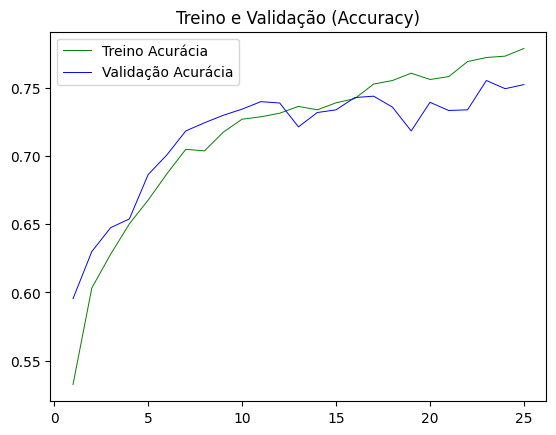

In [59]:
plt.plot(epochs, acc, color='green', label='Treino Acurácia', linewidth=0.7)
plt.plot(epochs, val_acc, color='blue', label='Validação Acurácia', linewidth=0.7)
plt.title('Treino e Validação (Accuracy)')
plt.legend()

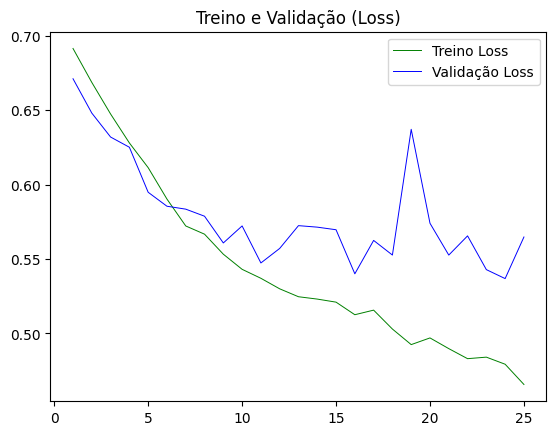

In [60]:
plt.plot(epochs, loss, color='green', label='Treino Loss', linewidth=0.7)
plt.plot(epochs, val_loss, color='blue', label='Validação Loss', linewidth=0.7)
plt.title('Treino e Validação (Loss)')
plt.legend()